In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
Mlb_all_pitchers_2018 = pd.read_csv('./All_pitchers_2018.csv')

In [3]:
Mlb_all_pitchers_2018.describe()

,Rk,Age,W,L,W-L%,ERA,G,GS,GF,CG,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
count,988.000000,988.000000,989.000000,989.000000,767.000000,989.000000,989.000000,989.000000,989.000000,989.000000,...,989.000000,989.000000,953.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,935.000000
mean,494.500000,28.158907,2.718908,2.741153,0.461346,inf,24.816987,5.327604,5.853387,0.043478,...,2.124368,209.934277,105.172088,5.160071,1.583720,10.014590,1.528369,4.242655,8.090881,2.598545
std,285.355334,3.681060,3.613383,3.243139,0.297325,NaN,20.743807,9.659059,8.972277,0.240467,...,2.556983,211.272927,65.454084,3.893574,1.023544,6.076204,2.027895,5.486126,3.104583,1.769567
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,4.000000,-2.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,247.750000,25.000000,0.000000,0.000000,0.286000,3.230000,7.000000,0.000000,0.000000,0.000000,...,0.000000,48.000000,69.000000,3.515000,1.185500,7.400000,0.600000,2.500000,6.600000,1.600000
50%,494.500000,28.000000,1.000000,2.000000,0.500000,4.360000,21.000000,0.000000,3.000000,0.000000,...,1.000000,148.000000,94.000000,4.320000,1.373000,8.900000,1.100000,3.400000,8.200000,2.300000
75%,741.250000,31.000000,4.000000,4.000000,0.667000,6.080000,35.000000,5.000000,8.000000,0.000000,...,3.000000,276.000000,125.000000,5.555000,1.654000,10.600000,1.700000,4.600000,9.900000,3.240000
max,988.000000,45.000000,21.000000,16.000000,1.000000,inf,91.000000,35.000000,65.000000,2.000000,...,17.000000,874.000000,784.000000,60.160000,15.000000,54.000000,27.000000,108.000000,27.000000,23.000000


In [4]:
Mlb_all_pitchers_2018['IP'].mean()

48.998786653184546

In [5]:
Over_100 = Mlb_all_pitchers_2018.where(Mlb_all_pitchers_2018.IP > 100).dropna()

In [6]:
Over_100.describe()

,Rk,Age,W,L,W-L%,ERA,G,GS,GF,CG,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,495.824324,28.493243,9.229730,8.689189,0.505324,4.057162,29.270270,26.013514,1.047297,0.277027,...,4.878378,640.000000,107.783784,4.104257,1.273655,8.472297,1.167568,2.991216,8.373649,3.105946
std,274.214344,3.789525,4.082641,2.955109,0.147994,0.892463,5.871173,6.007916,3.275002,0.557215,...,3.307187,121.396186,27.357184,0.742411,0.166153,1.146650,0.344286,0.975616,1.619035,1.236672
min,16.000000,21.000000,1.000000,2.000000,0.067000,1.700000,19.000000,5.000000,0.000000,0.000000,...,0.000000,410.000000,68.000000,1.980000,0.861000,5.600000,0.400000,1.000000,5.000000,0.890000
25%,276.750000,25.750000,6.750000,6.000000,0.411250,3.495000,25.000000,22.000000,0.000000,0.000000,...,2.000000,533.750000,91.000000,3.620000,1.162750,7.775000,0.900000,2.300000,7.300000,2.192500
50%,491.000000,28.000000,9.000000,9.000000,0.500000,4.040000,30.000000,27.000000,0.000000,0.000000,...,4.000000,644.000000,102.000000,4.150000,1.276500,8.500000,1.200000,2.950000,8.200000,2.865000
75%,742.750000,31.000000,12.000000,11.000000,0.602750,4.572500,32.000000,31.000000,0.000000,0.000000,...,7.000000,740.000000,121.000000,4.580000,1.373500,9.200000,1.400000,3.500000,9.300000,3.682500
max,988.000000,45.000000,21.000000,16.000000,0.833000,6.790000,54.000000,35.000000,27.000000,2.000000,...,17.000000,874.000000,219.000000,5.800000,1.804000,11.900000,2.100000,8.200000,13.500000,7.840000


In [7]:
Nine_wins = Over_100.where(Over_100.W == 9)

In [8]:
Nine_wins.describe()

,Rk,Age,W,L,W-L%,ERA,G,GS,GF,CG,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
count,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,582.666667,28.866667,9.0,9.466667,0.501000,3.918667,31.133333,28.866667,0.600000,0.333333,...,5.533333,691.466667,107.266667,4.206000,1.225867,8.320000,1.200000,2.726667,7.913333,3.073333
std,293.520422,3.907258,0.0,3.113718,0.086358,0.528230,3.181793,2.972893,1.352247,0.487950,...,3.398879,60.628690,16.554959,0.538898,0.077932,0.801071,0.340168,0.687092,1.040513,0.868913
min,16.000000,22.000000,9.0,5.000000,0.375000,2.730000,26.000000,20.000000,0.000000,0.000000,...,1.000000,583.000000,86.000000,3.190000,1.041000,6.300000,0.400000,1.600000,6.200000,1.920000
25%,441.000000,26.500000,9.0,7.000000,0.429000,3.700000,30.000000,28.000000,0.000000,0.000000,...,2.000000,647.000000,98.000000,3.870000,1.181500,7.900000,1.000000,2.250000,7.250000,2.640000
50%,519.000000,27.000000,9.0,9.000000,0.500000,3.940000,31.000000,30.000000,0.000000,0.000000,...,6.000000,683.000000,102.000000,4.270000,1.207000,8.500000,1.300000,2.600000,8.200000,2.920000
75%,839.500000,31.000000,9.0,12.000000,0.563000,4.265000,31.500000,30.500000,0.500000,1.000000,...,9.000000,736.500000,114.500000,4.530000,1.280500,8.700000,1.400000,3.150000,8.500000,3.320000
max,971.000000,37.000000,9.0,15.000000,0.643000,4.850000,41.000000,32.000000,5.000000,1.000000,...,10.000000,806.000000,142.000000,5.220000,1.343000,9.600000,1.700000,4.300000,9.900000,5.340000


In [9]:
Nine_losses = Nine_wins.where(Nine_wins.L == 9).dropna()

In [10]:
Nine_losses

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
649,650.0,Ivan Nova\novaiv01,31.0,PIT,NL,9.0,9.0,0.5,4.19,29.0,...,9.0,683.0,93.0,4.57,1.280,9.6,1.5,2.0,6.4,3.26
888,889.0,Julio Teheran\teherju01,27.0,ATL,NL,9.0,9.0,0.5,3.94,31.0,...,2.0,724.0,102.0,4.83,1.173,6.3,1.3,4.3,8.3,1.93


In [11]:
Nine_losses.loc[649,'IP']

161.0

In [12]:
historic_pitching = pd.read_csv('./Pitching.csv')

In [13]:
historic_pitching.shape

(46699, 30)

In [14]:
historic_pitching.head(10)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
5,flowedi01,1871,1,TRO,NaN,0,0,1,0,0,...,NaN,0,NaN,0,3.0,1,0,NaN,NaN,NaN
6,mackde01,1871,1,RC1,NaN,0,1,3,1,1,...,NaN,1,NaN,0,70.0,1,30,NaN,NaN,NaN
7,mathebo01,1871,1,FW1,NaN,6,11,19,19,19,...,NaN,15,NaN,2,876.0,0,243,NaN,NaN,NaN
8,mcbridi01,1871,1,PH1,NaN,18,5,25,25,25,...,NaN,3,NaN,0,1059.0,0,223,NaN,NaN,NaN
9,mcmuljo01,1871,1,TRO,NaN,12,15,29,29,28,...,NaN,44,NaN,0,1334.0,0,362,NaN,NaN,NaN


In [15]:
len(historic_pitching.playerID.unique())

9655

In [16]:
historic_pitching.tail()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
46694,zamorda01,2018,1,NYN,NL,1,0,16,0,0,...,1.0,0,1.0,0,36.0,4,3,1.0,0.0,1.0
46695,zastrro01,2018,1,CHN,NL,1,0,6,0,0,...,0.0,0,1.0,0,26.0,2,3,0.0,0.0,0.0
46696,zieglbr01,2018,1,MIA,NL,1,5,53,0,0,...,4.0,1,2.0,0,213.0,23,25,0.0,1.0,11.0
46697,zieglbr01,2018,2,ARI,NL,1,1,29,0,0,...,2.0,0,0.0,0,92.0,1,9,0.0,1.0,3.0
46698,zimmejo02,2018,1,DET,AL,7,8,25,25,0,...,0.0,1,2.0,0,556.0,0,76,2.0,5.0,4.0


In [17]:
Counter(historic_pitching.playerID).most_common()

[('newsobo01', 29),
 ('kaatji01', 28),
 ('johnto01', 28),
 ('carltst01', 27),
 ('ryanno01', 27),
 ('moyerja01', 27),
 ('wilheho01', 26),
 ('niekrph01', 26),
 ('houghch01', 26),
 ('oroscje01', 26),
 ('mulhote01', 26),
 ('weathda01', 26),
 ('hoytwa01', 25),
 ('perryga01', 25),
 ('suttodo01', 25),
 ('niekrjo01', 25),
 ('reussje01', 25),
 ('eckerde01', 25),
 ('darwida01', 25),
 ('morgami01', 25),
 ('maddugr01', 25),
 ('quinnja01', 24),
 ('zachato01', 24),
 ('blylebe01', 24),
 ('martide01', 24),
 ('honeyri01', 24),
 ('clemero02', 24),
 ('wellsda01', 24),
 ('johnsra05', 24),
 ('stantmi02', 24),
 ('hawkila01', 24),
 ('youngcy01', 23),
 ('pennohe01', 23),
 ('grimebu01', 23),
 ('ruffire01', 23),
 ('wynnea01', 23),
 ('simmocu01', 23),
 ('mcmahdo02', 23),
 ('millebo04', 23),
 ('alexado01', 23),
 ('gossari01', 23),
 ('tananfr01', 23),
 ('candejo01', 23),
 ('colonba01', 23),
 ('jonessa01', 22),
 ('spahnwa01', 22),
 ('mcdanli01', 22),
 ('pizarju01', 22),
 ('sadecra01', 22),
 ('seaveto01', 22),
 ('ga

In [18]:
playerid_list = pd.read_csv('./playerid_list.csv',sep='|', encoding='latin-1')

In [19]:
playerid_list.head()

,"LASTNAME,""FIRSTNAME"",""PLAYERID"",""DAVENPORTCODE"",""MLBCODE"",""RETROSHEETCODE"""
0,"Ausmus,""Brad"",""3"",""AUSMUS19690414A"",""110385"",""..."
1,"Bagwell,""Jeff"",""4"",""BAGWELL19680527A"",""110432""..."
2,"Berkman,""Lance"",""6"",""BERKMAN19760210A"",""204020..."
3,"Biggio,""Craig"",""7"",""BIGGIO19651214A"",""110987"",..."
4,"Blum,""Geoff"",""8"",""BLUM19730426A"",""150398"",""blu..."


In [20]:
pitch_table = pd.read_csv('./pitch_table.csv')

In [21]:
pitch_table.shape

(0, 64)

In [22]:
pitching_postseason = pd.read_csv('./PitchingPost.csv')

In [23]:
pitching_postseason;

In [24]:
edited_pitch_table = pd.read_csv('./edited_pitch_table.csv')

In [25]:
People = pd.read_csv('./People.csv')

In [26]:
People.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [27]:
historic_pitching = pd.merge(historic_pitching,
                             People,
                             on='playerID')

In [28]:
historic_pitching.tail()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
46694,wilsobr02,2018,1,ATL,NL,1,0,3,1,0,...,Wilson,Bryse Everett,225.0,73.0,R,R,2018-08-20,2018-09-18,wilsb003,wilsobr02
46695,wingetr01,2018,1,SDN,NL,0,0,22,0,0,...,Wingenter,Anthony James,200.0,79.0,R,R,2018-08-07,2018-09-29,wingt001,wingetr01
46696,wrighky01,2018,1,ATL,NL,0,0,4,0,0,...,Wright,Kyle Hardy,200.0,76.0,R,R,2018-09-04,2018-09-26,wrigk001,wrighky01
46697,yarbrry01,2018,1,TBA,AL,16,6,38,6,0,...,Yarbrough,Ryan Christian,205.0,77.0,R,L,2018-03-31,2018-09-30,yarbr001,yarbrry01
46698,zamorda01,2018,1,NYN,NL,1,0,16,0,0,...,Zamora,Daniel James,195.0,75.0,L,L,2018-08-17,2018-09-29,zamod001,zamorda01


In [29]:
historic_pitching.shape

(46699, 53)

In [30]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [31]:
historic_pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN,1848.0,9.0,2.0,USA,PA,Philadelphia,1921.0,4.0,3.0,USA,PA,Philadelphia,George,Bechtel,George W.,165.0,71.0,NaN,NaN,1871-05-20,1876-08-19,bechg101,bechtge01
1,bechtge01,1873,1,PH2,NaN,0,2,3,2,1,0,0,48,27,8,0,2,0,NaN,4.50,NaN,0,NaN,0,87.0,1,24,NaN,NaN,NaN,1848.0,9.0,2.0,USA,PA,Philadelphia,1921.0,4.0,3.0,USA,PA,Philadelphia,George,Bechtel,George W.,165.0,71.0,NaN,NaN,1871-05-20,1876-08-19,bechg101,bechtge01
2,bechtge01,1874,1,PH2,NaN,1,3,6,4,4,0,0,117,57,7,0,1,0,NaN,1.62,NaN,0,NaN,0,193.0,1,42,NaN,NaN,NaN,1848.0,9.0,2.0,USA,PA,Philadelphia,1921.0,4.0,3.0,USA,PA,Philadelphia,George,Bechtel,George W.,165.0,71.0,NaN,NaN,1871-05-20,1876-08-19,bechg101,bechtge01
3,bechtge01,1875,1,PH3,NaN,2,12,14,14,14,0,0,378,169,38,0,5,6,NaN,2.71,NaN,9,NaN,0,621.0,0,138,NaN,NaN,NaN,1848.0,9.0,2.0,USA,PA,Philadelphia,1921.0,4.0,3.0,USA,PA,Philadelphia,George,Bechtel,George W.,165.0,71.0,NaN,NaN,1871-05-20,1876-08-19,bechg101,bechtge01
4,bechtge01,1875,2,PH1,NaN,3,1,4,4,4,0,0,108,41,10,0,3,3,NaN,2.50,NaN,1,NaN,0,150.0,0,19,NaN,NaN,NaN,1848.0,9.0,2.0,USA,PA,Philadelphia,1921.0,4.0,3.0,USA,PA,Philadelphia,George,Bechtel,George W.,165.0,71.0,NaN,NaN,1871-05-20,1876-08-19,bechg101,bechtge01


In [45]:
historic_pitching.where(historic_pitching.stint > 1).dropna(how='all')

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,full_name
4,bechtge01,1875.0,2.0,PH1,NaN,3.0,1.0,4.0,4.0,4.0,0.0,0.0,108.0,41.0,10.0,0.0,3.0,3.0,NaN,2.50,NaN,1.0,NaN,0.0,150.0,0.0,19.0,NaN,NaN,NaN,1848.0,9.0,2.0,USA,PA,Philadelphia,1921.0,4.0,3.0,USA,PA,Philadelphia,George,Bechtel,George W.,165.0,71.0,NaN,NaN,1871-05-20,1876-08-19,bechg101,bechtge01,George W. Bechtel
7,brainas01,1872.0,2.0,MID,NaN,0.0,2.0,2.0,2.0,1.0,0.0,0.0,24.0,13.0,5.0,1.0,0.0,0.0,NaN,5.63,NaN,0.0,NaN,0.0,50.0,0.0,17.0,NaN,NaN,NaN,1841.0,NaN,NaN,USA,NY,Albany,1888.0,12.0,29.0,USA,CO,Denver,Asa,Brainard,Asahel,150.0,68.0,NaN,R,1871-05-05,1874-10-14,braia102,brainas01,Asahel Brainard
26,fleetfr01,1875.0,2.0,BR2,NaN,0.0,1.0,2.0,1.0,1.0,0.0,0.0,46.0,26.0,8.0,0.0,0.0,0.0,NaN,4.70,NaN,1.0,NaN,0.0,78.0,0.0,20.0,NaN,NaN,NaN,1848.0,NaN,NaN,USA,NY,New York,1900.0,6.0,13.0,USA,NY,New York,Frank,Fleet,Frank H.,NaN,NaN,NaN,NaN,1871-10-18,1875-10-09,fleef101,fleetfr01,Frank H. Fleet
38,mathebo01,1881.0,2.0,BSN,NL,1.0,0.0,5.0,1.0,1.0,0.0,2.0,69.0,22.0,6.0,0.0,11.0,5.0,NaN,2.35,NaN,2.0,NaN,0.0,103.0,4.0,11.0,NaN,NaN,NaN,1851.0,11.0,21.0,USA,MD,Baltimore,1898.0,4.0,17.0,USA,MD,Baltimore,Bobby,Mathews,Robert T.,140.0,65.0,R,R,1871-05-04,1887-10-10,mathb101,mathebo01,Robert T. Mathews
84,zettlge01,1872.0,2.0,BR1,NaN,1.0,8.0,9.0,9.0,8.0,0.0,0.0,226.0,106.0,30.0,1.0,6.0,8.0,NaN,3.58,NaN,6.0,NaN,0.0,360.0,0.0,62.0,NaN,NaN,NaN,1844.0,7.0,12.0,USA,NY,Williamsburg,1905.0,5.0,22.0,USA,NY,Patchogue,George,Zettlein,George,162.0,69.0,R,R,1871-05-08,1876-09-16,zettg101,zettlge01,George Zettlein
88,zettlge01,1875.0,2.0,PH2,NaN,12.0,8.0,21.0,21.0,20.0,1.0,0.0,544.0,209.0,42.0,0.0,10.0,13.0,NaN,2.08,NaN,4.0,NaN,0.0,803.0,0.0,121.0,NaN,NaN,NaN,1844.0,7.0,12.0,USA,NY,Williamsburg,1905.0,5.0,22.0,USA,NY,Patchogue,George,Zettlein,George,162.0,69.0,R,R,1871-05-08,1876-09-16,zettg101,zettlge01,George Zettlein
105,martiph01,1872.0,2.0,BR1,NaN,2.0,7.0,10.0,9.0,9.0,0.0,0.0,255.0,143.0,37.0,1.0,9.0,3.0,NaN,3.92,NaN,9.0,NaN,0.0,448.0,1.0,106.0,NaN,NaN,NaN,1845.0,8.0,4.0,USA,NY,New York,1933.0,5.0,24.0,USA,NY,Hollis,Phonney,Martin,Alphonse Case,148.0,67.0,NaN,NaN,1872-04-26,1873-10-21,martp104,martiph01,Alphonse Case Martin
129,bondto01,1884.0,2.0,IN2,AA,0.0,5.0,5.0,5.0,5.0,0.0,0.0,129.0,62.0,27.0,5.0,4.0,15.0,NaN,5.65,NaN,7.0,2.0,0.0,206.0,0.0,51.0,NaN,NaN,NaN,1856.0,4.0,2.0,Ireland,NaN,Granard,1941.0,1.0,24.0,USA,MA,Boston,Tommy,Bond,Thomas Henry,160.0,67.0,R,R,1874-05-05,1884-08-11,bondt101,bondto01,Thomas Henry Bond
154,bradlge01,1881.0,2.0,CL2,NL,2.0,4.0,6.0,6.0,5.0,0.0,0.0,153.0,70.0,22.0,2.0,3.0,6.0,NaN,3.88,NaN,2.0,NaN,0.0,222.0,0.0,36.0,NaN,NaN,NaN,1852.0,7.0,13.0,USA,PA,Reading,1931.0,10.0,2.0,USA,PA,Philadelphia,George,Bradley,George Washington,175.0,70.0,R,R,1875-05-04,1888-08-08,bradg103,bradlge01,George Washington Bradley
156,bradlge01,1883.0,2.0,PH4,AA,16.0,7.0,26.0,23.0,22.0,0.0,0.0,643.0,215.0,75.0,7.0,22.0,56.0,NaN,3.15,NaN,15.0,NaN,0.0,902.0,3.0,129.0,NaN,NaN,NaN,1852.0,7.0,13.0,USA,PA,Reading,1931.0,10.0,2.0,USA,PA,Philadelphia,George,Bradley,George Washington,175.0,70.0,R,R,1875-05-04,1888-08-08,bradg103,bradlge01,George Washington Bradley


In [33]:
historic_pitching['full_name'] = historic_pitching.nameGiven + ' ' + historic_pitching.nameLast

In [34]:
year_group_table = historic_pitching[['playerID','yearID','full_name','W','L','G','GS','ERA','ER','IPouts','H','BB','SO','BAOpp','IBB']].groupby(['playerID','yearID','full_name']).sum().reset_index()

In [35]:
historic_pitching.full_name

0                    George W. Bechtel
1                    George W. Bechtel
2                    George W. Bechtel
3                    George W. Bechtel
4                    George W. Bechtel
5                      Asahel Brainard
6                      Asahel Brainard
7                      Asahel Brainard
8                      Asahel Brainard
9                      Asahel Brainard
10            Robert Vavasour Ferguson
11            Robert Vavasour Ferguson
12            Robert Vavasour Ferguson
13            Robert Vavasour Ferguson
14            Robert Vavasour Ferguson
15            Robert Vavasour Ferguson
16              William Charles Fisher
17              William Charles Fisher
18              William Charles Fisher
19              William Charles Fisher
20              William Charles Fisher
21              William Charles Fisher
22              William Charles Fisher
23                      Frank H. Fleet
24                      Frank H. Fleet
25                      F

In [36]:
Counter(year_group_table['full_name']).most_common()

[('Lynn Nolan Ryan', 27),
 ('Thomas Edward John', 26),
 ('Charles Oliver Hough', 25),
 ('James Lee Kaat', 25),
 ('Jamie Moyer', 25),
 ('Steven Norman Carlton', 24),
 ('William Roger Clemens', 24),
 ('Dennis Lee Eckersley', 24),
 ('Philip Henry Niekro', 24),
 ('Jesse Russell Orosco', 24),
 ('Gregory Alan Maddux', 23),
 ('Jose Dennis Martinez', 23),
 ('John Picus Quinn', 23),
 ('Donald Howard Sutton', 23),
 ('Early Wynn', 23),
 ('Rik Aalbert Blyleven', 22),
 ('Thomas Michael Glavine', 22),
 ('Richard Michael Gossage', 22),
 ('Randall David Johnson', 22),
 ('Samuel Pond Jones', 22),
 ('Michael Thomas Morgan', 22),
 ('Joseph Franklin Niekro', 22),
 ('Herbert Jefferis Pennock', 22),
 ('Gaylord Jackson Perry', 22),
 ('Jerry Reuss', 22),
 ('Charles Herbert Ruffing', 22),
 ('Denton True Young', 22),
 ('Bartolo Colon', 21),
 ('Daniel Wayne Darwin', 21),
 ('John Anthony Franco', 21),
 ('Thomas Gordon', 21),
 ('LaTroy Hawkins', 21),
 ('Frederick Wayne Honeycutt', 21),
 ('Waite Charles Hoyt', 21),

In [37]:
pitching_post_1969 = historic_pitching.where(historic_pitching.yearID > 1969)

In [38]:
post_1969_table = year_group_table.where(year_group_table.yearID > 1969)

In [39]:
post_1969_table.describe()

,yearID,W,L,G,GS,ERA,ER,IPouts,H,BB,SO,BAOpp,IBB
count,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000,25328.000000
mean,1997.658402,4.258015,4.258015,28.115524,8.519820,5.625640,34.529375,228.573752,75.621131,27.928024,53.035494,0.295963,2.413850
std,13.816614,4.786593,4.188047,20.477226,11.918164,5.803723,29.978478,207.520300,67.693958,23.807653,50.599796,0.116715,2.716258
min,1970.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,0.000000,1.000000,10.000000,0.000000,3.350000,11.000000,60.000000,22.000000,9.000000,13.000000,0.239000,0.000000
50%,1999.000000,3.000000,3.000000,27.000000,1.000000,4.380000,25.000000,171.000000,54.000000,22.000000,40.000000,0.268000,2.000000
75%,2010.000000,6.000000,7.000000,39.000000,16.000000,6.080000,52.000000,332.000000,112.000000,41.000000,76.000000,0.308000,4.000000
max,2018.000000,27.000000,22.000000,106.000000,49.000000,189.000000,148.000000,1130.000000,381.000000,204.000000,383.000000,1.689000,24.000000


In [40]:
pitching_post_1969.dropna(subset=['yearID']).describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27502.000000,27480.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,27512.000000,26381.000000,27512.000000,27512.000000,27512.000000,1351.000000,1351.000000,1351.000000,27512.000000,27512.000000
mean,1997.758905,1.083345,3.919999,3.919999,25.883614,7.843486,0.811719,0.217323,1.865731,210.428758,69.618058,31.788311,7.310919,25.710999,48.825349,0.272567,5.185087,2.222230,2.457837,2.154151,0.369802,300.630561,7.031768,34.980336,2.791582,2.216996,5.946211,1969.242876,6.699949,15.790201,2006.649149,6.691340,15.011103,201.535803,74.309574
std,13.807038,0.289888,4.650720,4.057119,19.821477,11.440773,2.469771,0.712997,6.173364,202.413527,65.876318,29.115046,7.405185,23.225223,49.209082,0.074976,5.239150,2.623721,2.818418,2.596509,0.867417,282.855017,11.509233,32.033237,3.279006,2.372667,6.370744,14.161463,3.466294,8.746178,9.757417,3.565502,9.045925,21.772411,2.113224
min,1970.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.000000,1.000000,1.000000,1975.000000,1.000000,1.000000,145.000000,66.000000
25%,1987.000000,1.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,50.000000,18.000000,9.000000,2.000000,7.000000,11.000000,0.237000,3.270000,0.000000,0.000000,0.000000,0.000000,76.000000,0.000000,10.000000,0.000000,0.000000,1.000000,1958.000000,4.000000,8.000000,2003.000000,4.000000,7.000000,185.000000,73.000000
50%,2000.000000,1.000000,2.000000,3.000000,23.000000,1.000000,0.000000,0.000000,0.000000,147.000000,48.000000,22.000000,5.000000,19.000000,34.000000,0.265000,4.260000,1.000000,2.000000,1.000000,0.000000,214.000000,2.000000,24.000000,2.000000,1.000000,4.000000,1970.000000,7.000000,16.000000,2009.000000,7.000000,15.000000,200.000000,74.000000
75%,2010.000000,1.000000,6.000000,6.000000,36.000000,13.000000,0.000000,0.000000,1.000000,297.000000,100.000000,47.000000,10.000000,37.000000,70.000000,0.297000,5.650000,3.000000,4.000000,3.000000,0.000000,425.000000,9.000000,51.000000,4.000000,3.000000,9.000000,1981.000000,10.000000,23.000000,2014.000000,10.000000,23.000000,215.000000,76.000000
max,2018.000000,5.000000,27.000000,22.000000,106.000000,49.000000,30.000000,10.000000,62.000000,1130.000000,381.000000,148.000000,50.000000,204.000000,383.000000,1.000000,189.000000,23.000000,26.000000,21.000000,16.000000,1538.000000,84.000000,166.000000,27.000000,17.000000,47.000000,1997.000000,12.000000,31.000000,2018.000000,12.000000,31.000000,315.000000,83.000000


In [41]:
historic_pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,46699.000000,42259.000000,46607.000000,32121.000000,46699.000000,45965.000000,46699.000000,46696.000000,46699.000000,46699.000000,27512.000000,27512.000000,26381.000000,46669.000000,46583.000000,46472.000000,18174.000000,18174.000000,18174.000000,46267.000000,46330.000000
mean,1970.476498,1.080901,4.644468,4.644468,23.695861,9.341827,3.036403,0.432921,1.501167,250.026617,83.545301,35.632048,6.445256,29.471980,46.524722,0.314151,5.099874,2.340649,2.616330,2.384140,0.298636,356.709247,6.301827,42.376111,2.791582,2.216996,5.946211,1942.368124,6.674452,15.724845,1972.286068,6.480191,15.518213,193.461020,73.440816
std,38.009031,0.287667,5.760254,4.950416,18.557884,12.221776,6.974422,1.092617,5.003730,255.016879,83.837896,33.187179,7.001005,27.942752,49.385648,0.625269,5.406189,2.734361,3.699836,3.164046,0.748765,357.066334,9.947505,42.854273,3.279006,2.372667,6.370744,37.512049,3.442231,8.778445,30.598133,3.526416,8.824654,21.951283,2.427299
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1835.000000,1.000000,1.000000,1873.000000,1.000000,1.000000,120.000000,55.000000
25%,1943.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,18.000000,9.000000,1.000000,7.000000,8.000000,0.240000,3.150000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,10.000000,0.000000,0.000000,1.000000,1914.000000,4.000000,8.000000,1952.000000,3.000000,8.000000,180.000000,72.000000
50%,1980.000000,1.000000,2.000000,3.000000,21.000000,2.000000,0.000000,0.000000,0.000000,163.000000,54.000000,24.000000,4.000000,21.000000,31.000000,0.266000,4.150000,1.000000,2.000000,1.000000,0.000000,237.000000,3.000000,27.000000,2.000000,1.000000,4.000000,1953.000000,7.000000,16.000000,1974.000000,6.000000,16.000000,190.000000,74.000000
75%,2003.000000,1.000000,7.000000,7.000000,35.000000,17.000000,2.000000,0.000000,1.000000,386.000000,131.000000,57.000000,9.000000,44.000000,68.000000,0.300000,5.520000,4.000000,4.000000,3.000000,0.000000,553.000000,8.000000,66.000000,4.000000,3.000000,9.000000,1974.000000,10.000000,23.000000,1998.000000,10.000000,23.000000,205.000000,75.000000
max,2018.000000,5.000000,60.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,772.000000,291.000000,50.000000,289.000000,513.000000,9.990000,189.000000,23.000000,83.000000,54.000000,16.000000,2906.000000,84.000000,519.000000,27.000000,17.000000,47.000000,1997.000000,12.000000,31.000000,2018.000000,12.000000,31.000000,315.000000,83.000000


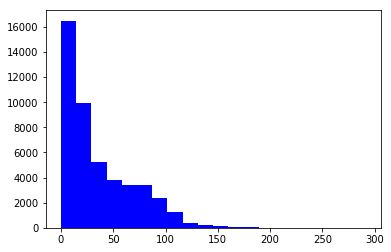

In [42]:
plt.hist(historic_pitching.ER.dropna(),bins=20, color='blue');

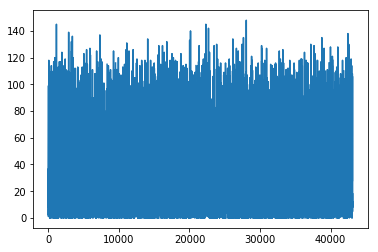

In [43]:
post_1969_table.ER.plot()

In [44]:
historic_pitching.to_csv('historic_pitching.csv',index=False)